# Demo notebook for generating a synthetic 3D image with lines and corrupting it with noise and Gaussian blur

In [1]:
import numpy as np
from skimage import io

from cs_sim.synth.lines import generate_img_with_lines
from cs_sim.corrupt.noise import gaussian_noise, poisson_noise, perlin_noise
from cs_sim.corrupt.conv import convolve
from cs_sim.corrupt import corrupt_image

## Specify parameters for a synthetic image

In [2]:
params_synth_data = dict(
    imgshape=(20, 100, 100),
    n_lines=10,
    maxval=255,
    nval=100
)

## Generate a synthetic image with lines

In [3]:
img = generate_img_with_lines(**params_synth_data)

/research/sharedresources/cbi/common/Anna/anaconda3/envs/quamd/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


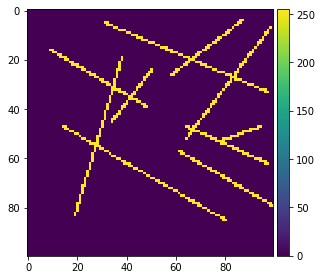

In [4]:
io.imshow(img.max(0))

## Specify parameters for image corruption with noise and blurring

There are 4 steps that can be combined in any order:

1. Perlin noise: adds low-frequency background. The `size` parameter specifies the size of the low-frequency pattern (in pixels), the `value` parameter specifies the amplitude.
2. Convolve: convolves the image with either a specified PSF image (`psf` parameter), or with a gaussian kernel of specified `sigma`. 
3. Poisson noise, with specified `snr`.
4. Gaussian noise, with specified `snr`.

In [5]:
corruption_steps = [
    (perlin_noise, {'size': 50, 'value': 0.1}),
    (poisson_noise, {'snr': 2}),
    (convolve, {'sigma': 2}),
    (gaussian_noise, {'snr': 100})
]

## Corrupt the image with the specified corruption steps

In [6]:
imgf = corrupt_image(img, corruption_steps)

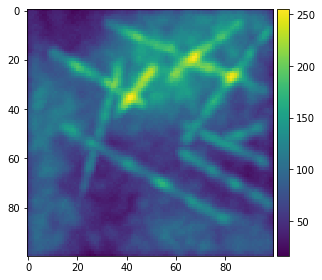

In [7]:
io.imshow(imgf.max(0))